# Project Title

## Topic
*What problem are you (or your stakeholder) trying to address?*
<br>
The effect education has on crime rates in Cincinnati


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
<br>
What is the coorelation education has to rising or falling crime rates in Cincinnati?
<br>
Which areas show the biggest coorelation between education and crime rates, and which ones show the least?


## What would an answer look like?
*What is your hypothesized answer to your question?*
<br>
I would still be using geographical charts and models like heat maps. I would use line graphs to compare education level/investment amounts to crime rates. Bar charts would be useful as well. 
<br>
An answer I want to see or atleast an outcome would be to help create solutions to crime rates using education. 


## Data Sources
*What 3 data sources have you identified for this project?*
<h3>Crimes committed in Cincinnati. Includes location data in particular. API</h3>
<br>
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf
<br>
<h3>Hamilton Count School Locations. API</h3>
<br>
https://data-cagisportal.opendata.arcgis.com/datasets/countywide-school-locations/explore?showTable=true
<br>
<h3>Hamilton county school ratings.</h3>
<br>
https://infogram.com/ohio-report-card-2022-1hd12yx1ykkow6k
<h3>Cincinnati Census Data. database</h3>
<br>
https://www.cincinnati-oh.gov/planning/maps-and-data/census-demographics/2020-census-data/
<br>

*How are you going to relate these datasets?*
<br>
i will relate crime to school ratings and education levels using common location data.

*How will you use this data to answer your project question?*
<br>
i will use location data to show maps (heat maps). I will answer the question by showing a connection between crime and education using location data. I will see how scores for schools could be impacted, and will try to see if improving school performance can lower crime rates.

In [4]:
# Python ≥3.10 is required
import sys
assert sys.version_info >= (3, 10)

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# other imports
from wordcloud import WordCloud


In [45]:
# Importing the data
crime_data = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Crime_Incidents.csv')
traffic_stops = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Traffic_Stops__Drivers_.csv')
shootings = pd.read_csv('./datasets/PDI__Police_Data_Initiative__CPD_Shootings.csv')

C:\Users\jacko\AppData\Local\Temp\ipykernel_1832\2136623229.py:2: DtypeWarning: Columns (1,7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Crime_Incidents.csv')
C:\Users\jacko\AppData\Local\Temp\ipykernel_1832\2136623229.py:3: DtypeWarning: Columns (3,4,5,6,7,17,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_stops = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Traffic_Stops__Drivers_.csv')


In [70]:
traffic_stops.sample(10)

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_DESC,INCIDENT_TYPE_ID,ACTIONTAKENCID,ACTIONTAKENCIDID,...,REPORT_TYPE_CID,SEX,RACE,FIELD_SUBJECT_CID,AGE_RANGE_CID,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CPD_NEIGHBORHOOD,DISTRICT
30001,W 8TH ST / WELLS ST,39.106437,-84.570412,CPD,ARR: ARREST,CPD191028001004,TRAFFIC STOP,TSTOP,WARNING,2.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,P321,EAST PRICE HILL,EAST PRICE HILL,EAST PRICE HILL,NaN
472735,32XX LINWOOD AV,-84.430803,39.127912,NaN,NaN,NaN,NaN,NaN,WARNING,2.0,...,CONTACT CARD,MALE,WHITE,DRIVER,46+,NaN,NaN,NaN,NaN,NaN
377382,49XX KELLOGG AV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CITATION TRAFFIC,3.0,...,CONTACT CARD,FEMALE,WHITE,DRIVER,46+,NaN,NaN,NaN,NaN,NaN
168836,41XX W LIBERTY ST,39.117166,-84.583124,CP,CONTACT CARD,LCP160316000823,TRAFFIC STOP,TS,NaN,NaN,...,CONTACT CARD,MALE,BLACK,DRIVER,46+,P324,WEST PRICE HILL,WEST PRICE HILL,WEST PRICE HILL,NaN
216775,10XX W 8TH ST,39.102869,-84.534141,CP,CITED,LCP150330000775,TRAFFIC STOP,TS,NaN,NaN,...,CC - CONTACT CARD,MALE,BLACK,DRIVER,36-45,P132,QUEENSGATE,QUEENSGATE,QUEENSGATE,NaN
11540,32XX WESTBROOK DR,39.138264,-84.610814,CPD,534: CONTACT CARD,CPD210309000666,INVESTIGATION,INV,WARNING,2.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,P331,WESTWOOD,WESTWOOD,WESTWOOD,NaN
284927,XX FINDLAY ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CITATION TRAFFIC,3.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,NaN,NaN,NaN,NaN,NaN
555458,14XX CENTRAL PARKWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARREST CAPIASWAR,7.0,...,CONTACT CARD,FEMALE,BLACK,DRIVER,18-25,NaN,NaN,NaN,NaN,NaN
499523,28XX CENTRAL PKWY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARREST MISD.,6.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,NaN,NaN,NaN,NaN,NaN
433134,53XX COLERAIN AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,1.0,...,CONTACT CARD,MALE,BLACK,DRIVER,36-45,NaN,NaN,NaN,NaN,NaN


In [59]:
crime_data.sample(10)

,INSTANCEID,INCIDENT_NO,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,UCR,DST,BEAT,OFFENSE,...,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD
293747,5CD2679B-F185-44E1-B03B-F0493E837013,149024542,09/26/2014 12:48:00 PM,09/26/2014 12:40:00 PM,09/26/2014 12:40:00 PM,Z--EARLY CLOSED,552.0,4,1.0,BREAKING AND ENTERING,...,UNKNOWN,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,BURGLARY/BREAKING ENTERING,45219.0,CORRYVILLE,CORRYVILLE
221508,6F8C5278-44B4-482D-9547-DEC05E4EBCDE,169027400,10/19/2016 05:28:00 PM,10/19/2016 07:30:00 AM,10/19/2016 05:00:00 PM,Z--EARLY CLOSED,600.0,5,4.0,THEFT,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,THEFT,45224.0,COLLEGE HILL,COLLEGE HILL
99408,690305C4-336B-43B2-8145-B4B08AC36474,199023107,10/04/2019 07:09:00 PM,10/04/2019 05:00:00 PM,10/04/2019 06:00:00 PM,Z--EARLY CLOSED,1493.0,4,6,CRIMINAL DAMAGING/ENDANGERING,...,UNDER 18,WHITE,NOT OF HISPANIC ORIG,MALE,1.0,3.0,PART 2 MINOR,45216.0,nan,NaN
346226,DE57AAF7-1E49-4BBE-8D63-917B0728BB00,139005400,03/07/2013 11:00:00 PM,03/04/2013 10:00:00 AM,03/07/2013 11:00:00 PM,H--WARRANT ISSUED,701.0,3,5.0,UNAUTHORIZED USE OF MOTOR VEHICLE,...,31-40,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,UNAUTHORIZED USE,45225.0,VILLAGES AT ROLL HILL,VILLAGES AT ROLL HILL
442094,65BE2666-0FF3-4036-AFD5-E8AF763D092E,21102039,05/16/2011 10:20:00 AM,05/15/2011 10:00:00 PM,05/16/2011 10:10:00 AM,Z--EARLY CLOSED,600.0,2,2.0,THEFT,...,UNKNOWN,NaN,NaN,NaN,2.0,NaN,THEFT,45208.0,OAKLEY,OAKLEY
222503,7DE50DF2-F31A-4991-A1BB-EAC67B05F5F9,169030582,11/22/2016 11:18:00 AM,11/22/2016 11:15:00 AM,11/22/2016 11:18:00 AM,B--PROSECUTION DECLINED,303.0,5,1.0,AGGRAVATED ROBBERY,...,18-25,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,ROBBERY,45219.0,CUF - HEIGHTS,CUF
305026,774470A2-94AA-49BB-A971-66D0BA7B1B29,149015457,06/28/2014 02:30:00 AM,06/27/2014 08:45:00 AM,06/28/2014 01:15:00 AM,F--CLEARED BY ARREST - ADULT,862.0,4,5.0,DOMESTIC VIOLENCE,...,18-25,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,PART 2 MINOR,45237.0,BOND HILL,ROSELAWN
154017,57CC65BA-6B76-453E-894E-F0F626EA0286,189016811,06/24/2018 09:58:14 AM,06/24/2018 09:00:00 AM,06/24/2018 09:05:00 AM,J--CLOSED,810.0,5,1.0,ASSAULT,...,61-70,WHITE,NOT OF HISPANIC ORIG,MALE,1.0,1.0,PART 2 MINOR,45220.0,CUF,CUF
95486,2E588DB3-64F1-4C77-B0BA-2B5500B7EEC6,199026688,11/17/2019 11:38:00 PM,11/17/2019 10:45:00 PM,11/17/2019 11:00:00 PM,F--CLEARED BY ARREST - ADULT,802.0,3,5.0,AGGRAVATED MENACING,...,31-40,WHITE,NOT OF HISPANIC ORIG,FEMALE,1.0,2.0,PART 2 MINOR,45225.0,nan,NaN
102275,FAA2FC76-AF3B-4A3F-AD33-5FF674AAE39D,199020862,09/10/2019 11:30:00 AM,09/10/2019 12:30:00 AM,09/10/2019 01:00:00 AM,J--CLOSED,1521.0,4,3,IMPROPERLY DISCHARGING FIREARM AT/INTO HABITAT...,...,UNKNOWN,NaN,NaN,NaN,2.0,NaN,PART 2 MINOR,45220.0,AVONDALE,AVONDALE


In [50]:
shootings.sample(10)

,DISTRICT,INCLOCATION_X,LATITUDE_X,LONGITUDE_X,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,OID,RMS_NO,VICCOUNT,CITYSTATEZIP,...,DATEOCCURRED,MONTHOCCURED,TIMEOCCURED,HROCCURED,DAYOCCURRED,RMSDUP,DATETIME,DSTFULL,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD
5227,3.0,35XX MCHENRY AV,39.149023,-84.564395,EAST WESTWOOD,EAST WESTWOOD,1540,31107316,1,"CINC, OH 45231",...,08/19/2011 12:00:00 PM,AUG,205000.0,20.0,FRI,31107316,08/19/2011 08:50:00 PM,DISTRICT 3,45225.0,EAST WESTWOOD
465,3.0,24XX NOTTINGHAM RD,39.158056,-84.561002,VILLAGES AT ROLL HILL,VILLAGES AT ROLL HILL,5660,219023774,1,NaN,...,09/21/2021 12:00:00 PM,SEP,182500.0,18.0,TUE,219023774,09/21/2021 06:25:00 PM,DISTRICT 3,NaN,VILLAGES AT ROLL HILL
4354,4.0,36XX READING RD,39.149902,-84.487780,NORTH AVONDALE,AVONDALE,246,40805681,1,NaN,...,08/06/2008 12:00:00 PM,AUG,NaN,NaN,WED,40805681,08/06/2008 12:00:00 AM,DISTRICT 4,45229.0,AVONDALE - NORTH AVONDALE
3337,3.0,30XX MCHENRY AV,39.142580,-84.578868,WESTWOOD,WESTWOOD,2788,149026157,1,"CINC, OH 45238",...,10/12/2014 12:00:00 PM,OCT,211500.0,21.0,SUN,149026157,10/12/2014 09:15:00 PM,DISTRICT 3,45211.0,WESTWOOD
5312,3.0,48XX GLENWAY AV,39.117360,-84.597555,WEST PRICE HILL,WEST PRICE HILL,1455,31105455,1,"CINC, OH 45205",...,06/25/2011 12:00:00 PM,JUN,221500.0,22.0,SAT,31105455,06/25/2011 10:15:00 PM,DISTRICT 3,45238.0,WEST PRICE HILL
3300,3.0,26XX LAFEUILLE AV,39.132742,-84.589010,WESTWOOD,WESTWOOD,2825,149029617,1,"CINCINNATI, OH 45211",...,11/19/2014 12:00:00 PM,NOV,221000.0,22.0,WED,149029617,11/19/2014 10:10:00 PM,DISTRICT 3,45211.0,WESTWOOD
4018,4.0,7XX OAK ST,39.129135,-84.493120,WALNUT HILLS,WALNUT HILLS,582,40903661,1,NaN,...,05/31/2009 12:00:00 PM,MAY,NaN,NaN,SUN,40903661,05/31/2009 12:00:00 AM,DISTRICT 4,45206.0,WALNUT HILLS
4311,5.0,59XX HAMILTON AV,39.199163,-84.545697,COLLEGE HILL,COLLEGE HILL,289,50805680,1,NaN,...,09/17/2008 12:00:00 PM,SEP,NaN,NaN,WED,50805680,09/17/2008 12:00:00 AM,DISTRICT 5,45224.0,COLLEGE HILL
327,5.0,50XX HAWAIIAN TERRACE,39.184012,-84.565588,MOUNT AIRY,MT. AIRY,5944,229015062,1,NaN,...,06/17/2022 12:00:00 PM,JUN,221500.0,22.0,FRI,229015062,06/17/2022 10:15:00 PM,DISTRICT 5,NaN,MOUNT AIRY
1211,4.0,3XX DORCHESTER AV,39.117593,-84.503431,MT AUBURN,MT. AUBURN,4914,209004703,1,NaN,...,03/02/2020 12:00:00 PM,MAR,80000.0,8.0,MON,209004703,03/02/2020 08:00:00 AM,DISTRICT 4,NaN,MOUNT AUBURN


In [8]:
crime_data.drop(crime_data.index[crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'] == 'nan'], inplace = True)
crime_data['DATE_REPORTED'] = pd.to_datetime(crime_data['DATE_REPORTED']).dt.normalize()
crime_data.drop(crime_data.index[crime_data['SUSPECT_RACE'] == 'UNKNOWN'], inplace = True)
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'] = crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].astype("str")

In [33]:
traffic_stops.drop(traffic_stops.index[traffic_stops['COMMUNITY_COUNCIL_NEIGHBORHOOD'] == 'NaN'], inplace = True)
traffic_stops.drop(traffic_stops.index[traffic_stops['LATITUDE_X'] == 'NaN'], inplace = True)
traffic_stops['DATE_REPORTED'] = pd.to_datetime(traffic_stops['DATE_REPORTED']).dt.normalize()

In [40]:
traffic_stops.sample()

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_DESC,INCIDENT_TYPE_ID,ACTIONTAKENCID,ACTIONTAKENCIDID,...,REPORT_TYPE_CID,SEX,RACE,FIELD_SUBJECT_CID,AGE_RANGE_CID,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CPD_NEIGHBORHOOD,DISTRICT
517738,61XX MADISON RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WARNING,2.0,...,CONTACT CARD,MALE,WHITE,DRIVER,36-45,NaN,NaN,NaN,NaN,NaN


In [76]:
traffic_stops_sample = traffic_stops.sample(1000)

<AxesSubplot:>

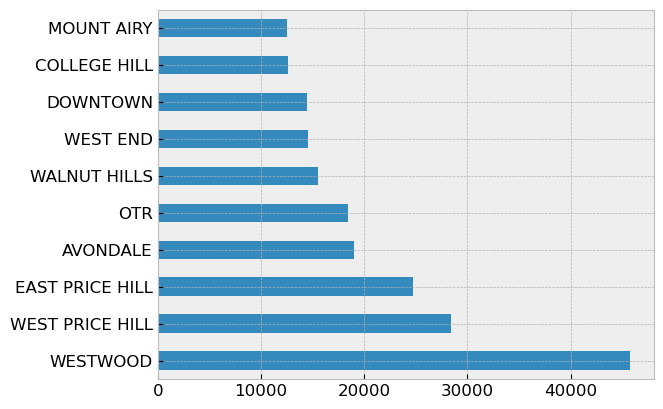

In [91]:
# top 10 total crime
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

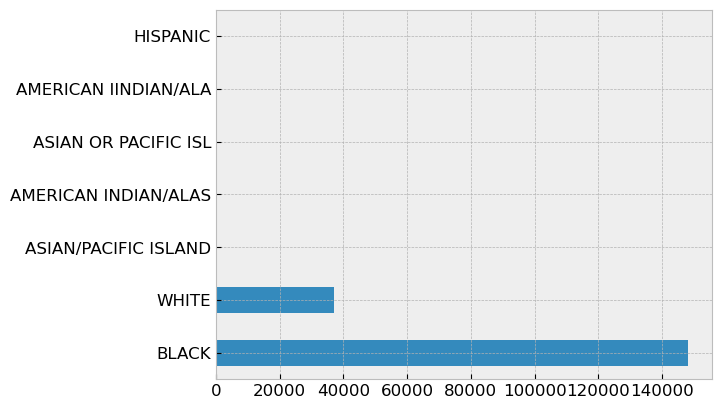

In [15]:
# counts of crime by race
crime_data['SUSPECT_RACE'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

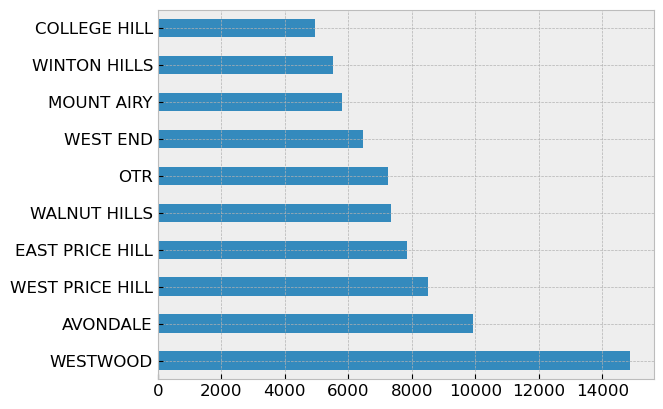

In [20]:
# top 10 neighborhoods sorted by amount of black suspects
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].where(crime_data['SUSPECT_RACE'] == 'BLACK').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

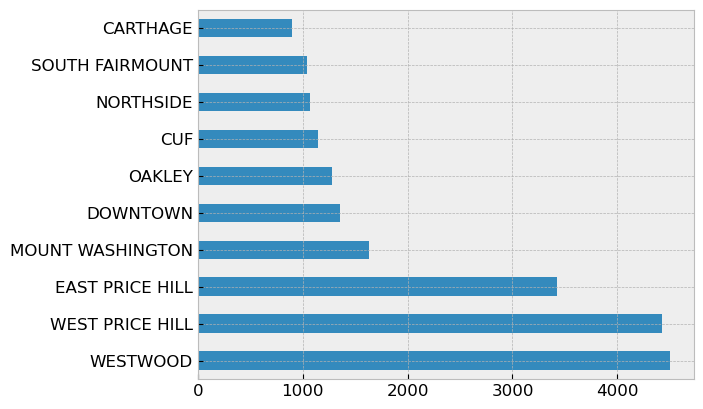

In [21]:
# top 10 neighborhoods sorted by amount of white suspects
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].where(crime_data['SUSPECT_RACE'] == 'WHITE').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

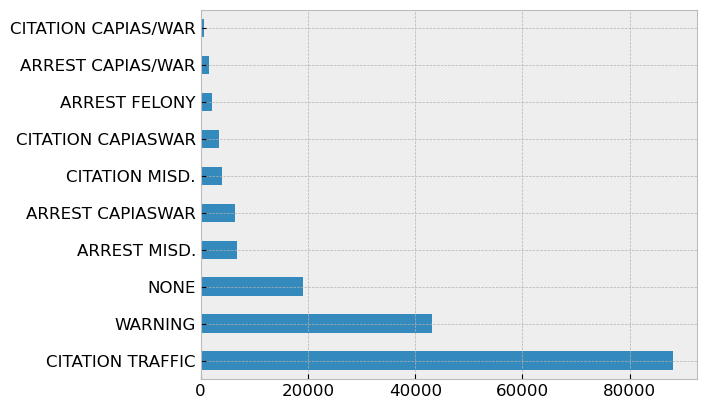

In [42]:
# top 10 results of a traffic stop sorted by white drivers
traffic_stops['ACTIONTAKENCID'].where(traffic_stops['RACE'] == 'WHITE').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

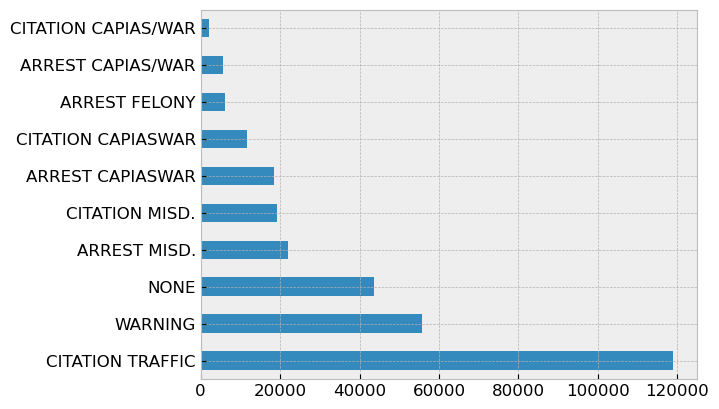

In [44]:
# top 10 results of a traffic stop sorted by black drivers
traffic_stops['ACTIONTAKENCID'].where(traffic_stops['RACE'] == 'BLACK').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

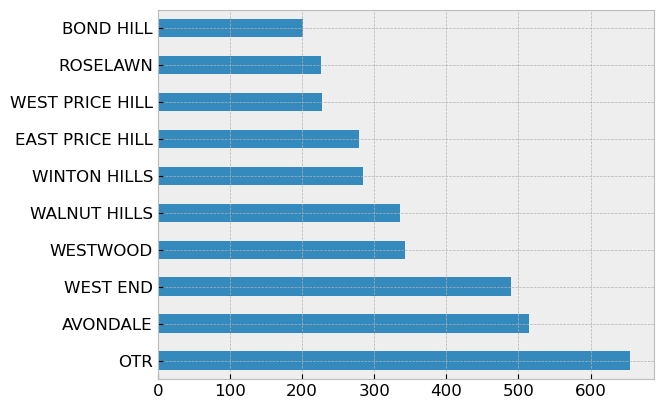

In [77]:
# top 10 neighbordhoods sorted by amount of shootings
shootings['COMMUNITY_COUNCIL_NEIGHBORHOOD'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

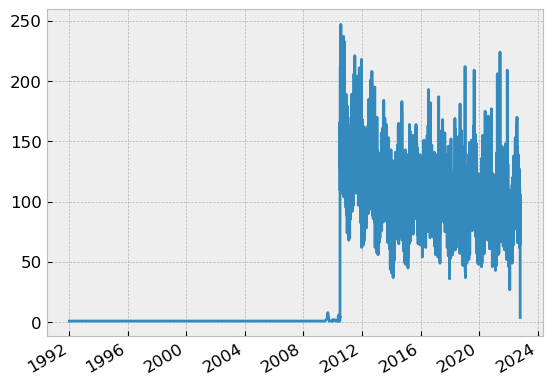

In [88]:
# crime over time
crime_data['DATE_REPORTED'].value_counts()[:].plot()

<AxesSubplot:>

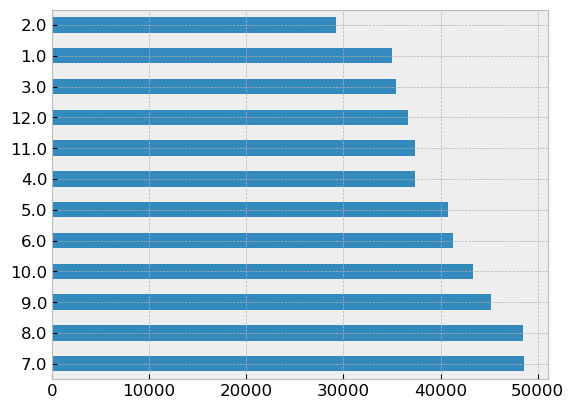

In [89]:
# crime amounts by month ranked
crime_data['DATE_REPORTED'].dt.month.value_counts()[:].plot(kind = "barh")

<AxesSubplot:>

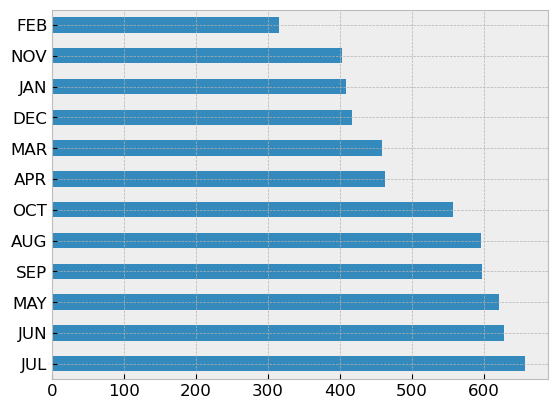

In [91]:
# months ranked by shooting amount
shootings['MONTHOCCURED'].value_counts()[:].plot(kind = "barh")

<h2>Machine Learning Plan</h2>
<br>
<p>My goal is to use machine learning to answer my new question of how crime affects different areas and demographics within Cincinnati. What type of machine learning model are you planning to use?
i plan to use supeervised regression. This is because i want to use factors that could play into the likelyhood of a crime happening and then predict the outcome or likelihood of a crime.
What are the challenges have you identified/are you anticipating in building your machine learning model?
I will have to work on identifying different columns that are related for example different columns in traffic stops indicate an arrest. I'll have to identify those if i want to make a simple prediction of whether someone will be arrested or not. 
How are you planning to address these challenges? I will combine columns depending on the case. </p>

In [1]:
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 5995 bytes to source.py
